# Environment Setup

In [ ]:
install.packages("bigrquery")
install.packages("corrplot")
install.packages("RColorBrewer")
install.packages("outliers")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘rapidjsonr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("bigrquery")
library(ggplot2)
library(dplyr)
library(corrplot)
library(RColorBrewer)
library(outliers)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getO

In [ ]:
bq_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AX4XfWguwu_JD-MoIYrX6IhEgbntAoSyY196KjffGvhpEAliBziEr0nUNVE


# Data Setup

In [ ]:
# Store the project id
projectid = "cse-6242-sp22-nyatl"
# Set the query
# sql <- "select * from `cse-6242-sp22-nyatl.AGG.weather_trips_per_day` where extract(year from date) = 2018"
sql <- "select * from `cse-6242-sp22-nyatl.AGG.weather_trips_per_day`"
# Run the query
project_query <- bq_project_query(projectid, sql, use_legacy_sql = FALSE)
# Download result to dataframe
df_all <- bq_table_download(project_query)

In [ ]:
head(df_all)

date,num_trips_per_day,Temp_Max,Temp_Avg,Temp_Min,Dew_Max,Dew_Avg,Dew_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Wind_spd_Max,Wind_spd_Avg,Wind_spd_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total
<date>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2021-02-06,30830,45,40.3,34,18,14.7,11,50,36.0,27,31,13.3,5,30.1,30.0,29.8,0.06
2021-06-01,98338,78,67.4,57,53,49.9,43,84,56.5,29,17,5.8,0,30.3,30.2,30.2,0.00
2021-05-01,91540,64,54.3,44,33,26.1,14,55,36.9,14,28,17.2,5,29.9,29.8,29.7,0.02
2021-03-10,54029,54,46.6,39,43,33.4,26,80,61.3,43,15,7.0,0,30.5,30.4,30.4,0.00
2021-06-06,104598,94,86.2,77,64,60.6,55,58,42.8,27,18,10.0,0,30.0,30.0,29.9,0.00
2021-04-20,94732,75,63.1,53,45,40.3,34,64,45.4,22,16,10.4,0,29.9,29.9,29.8,0.00


In [ ]:
s <- sample(nrow(df_all), floor(nrow(df_all)*0.70))
df_train <- df_all[s, 2:18]
df_test <- df_all[-s,2:18]
df <- df_all[,2:18]

### Outlier Detection

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    179   36444   57365   57596   75697  131612 

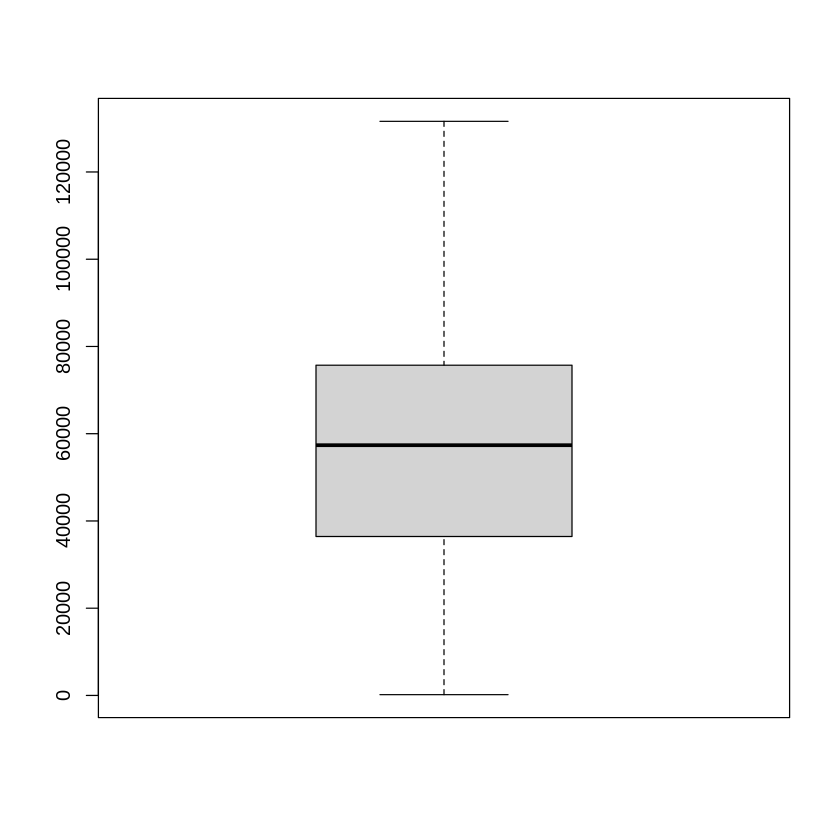


	Grubbs test for two opposite outliers

data:  df$num_trips_per_day
G = 4.96451, U = 0.99159, p-value = 1
alternative hypothesis: 179 and 131612 are outliers


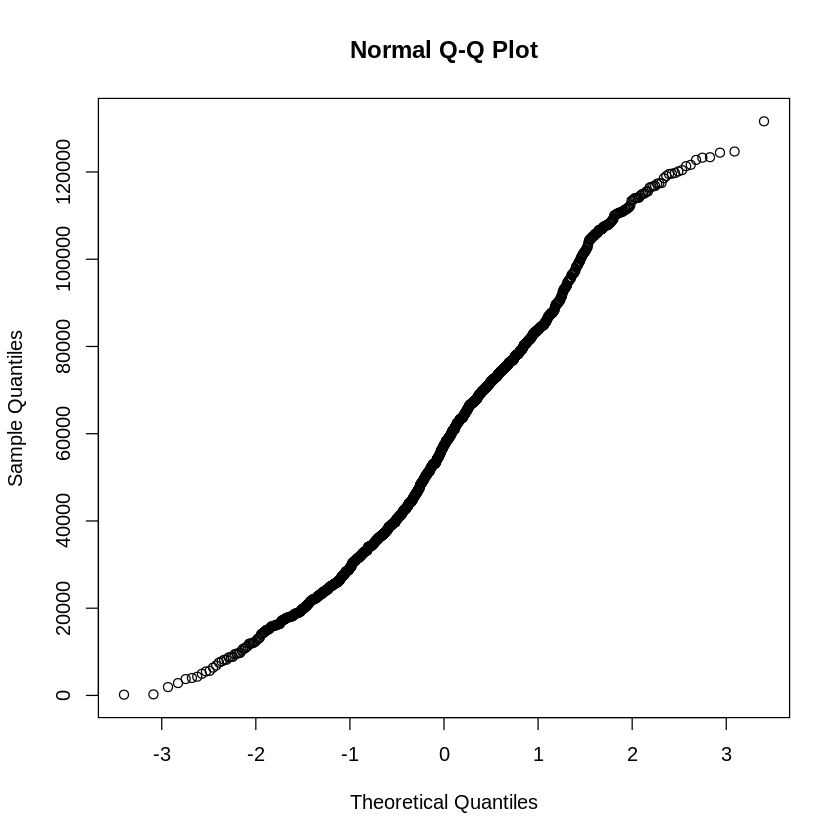

In [ ]:
ntd <- df$num_trips_per_day
summary(ntd)
boxplot(ntd)
qqnorm(ntd)
grubbs.test (df$num_trips_per_day, type=11)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1406  0.0800  6.8600 

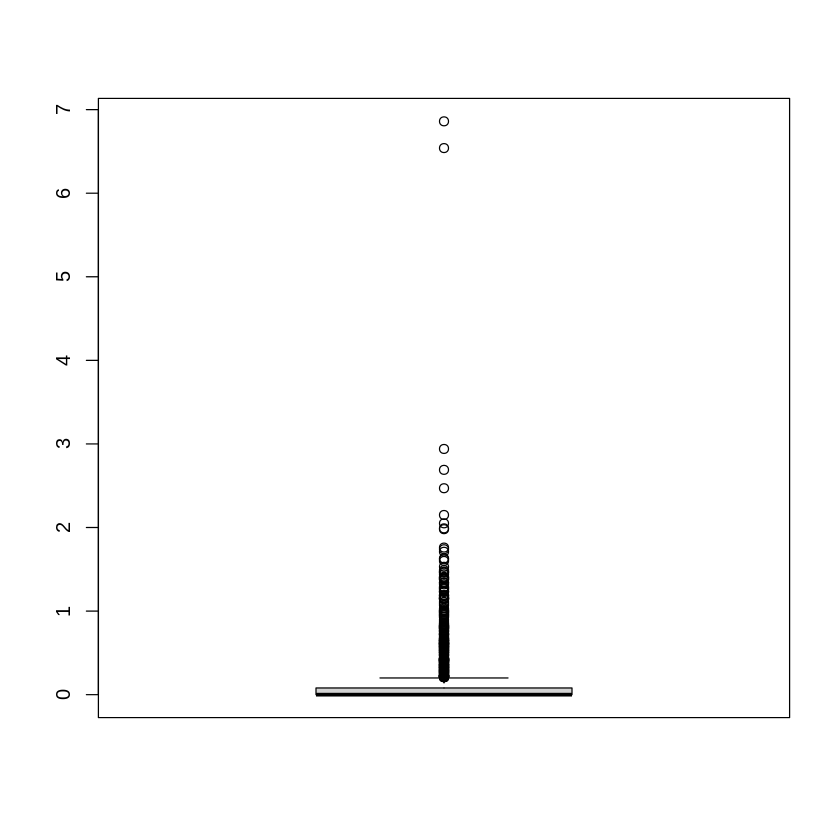


	Grubbs test for two opposite outliers

data:  df$Precipitation_Total
G = 17.15123, U = 0.81025, p-value < 2.2e-16
alternative hypothesis: 0 and 6.86 are outliers


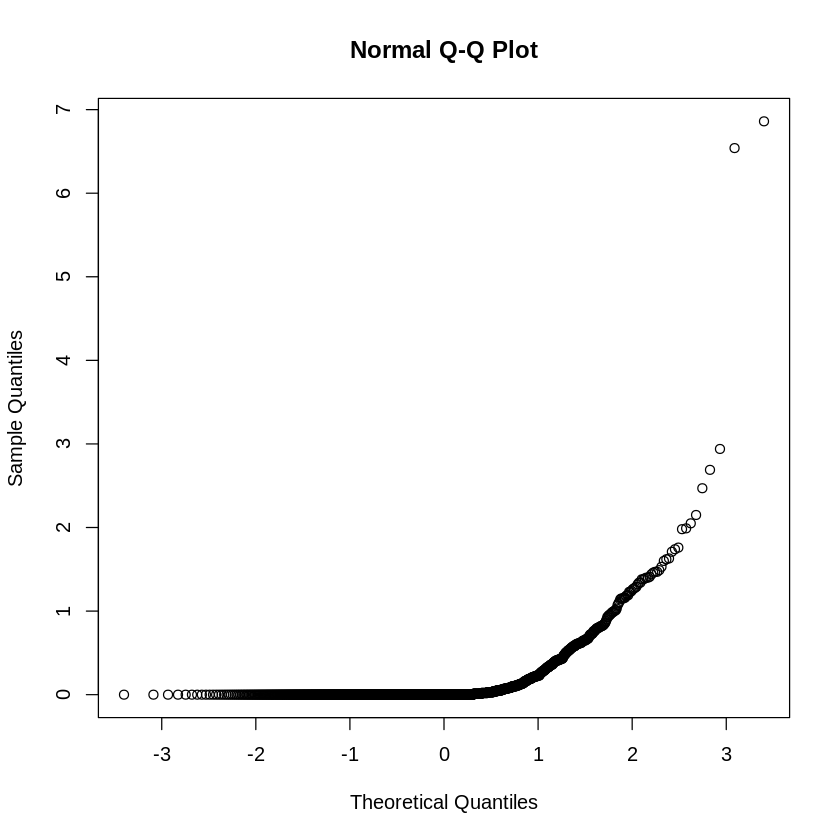

In [ ]:
pto <- df$Precipitation_Total
summary(pto)
boxplot(pto)
qqnorm(pto)
grubbs.test (df$Precipitation_Total, type=11)

In [ ]:
df <- filter (df,Precipitation_Total < 6 )
df_all <- filter (df_all,Precipitation_Total < 6 )

No outliers detected interms of the number of trips per day. The box plot and the grubbs test (with a high p-value) reflect the same.
However, we find outliers detected interms of percipitation, these are valid points as they reflect the days of snow storm and floods from Hurricane Ida in New York City. Analysis with and without the datapoints do not reflect significant change. We have filtered the extreme conditions from our analysis.

# Exploratory Data Analysis

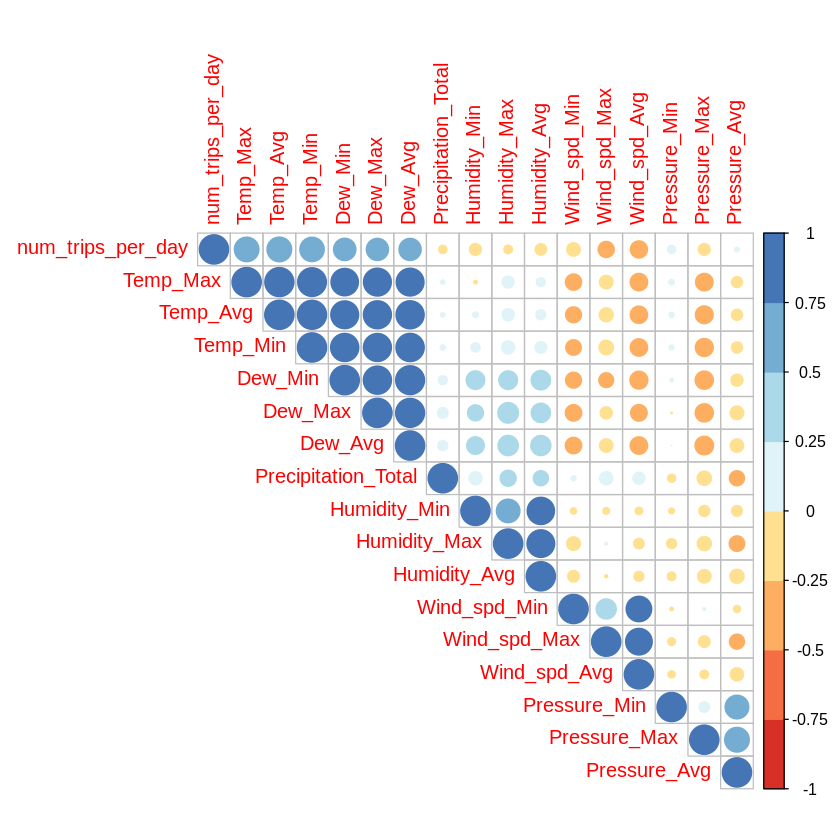

In [ ]:
M <-cor(df_all[,c(2:18)])
corrplot(M, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))


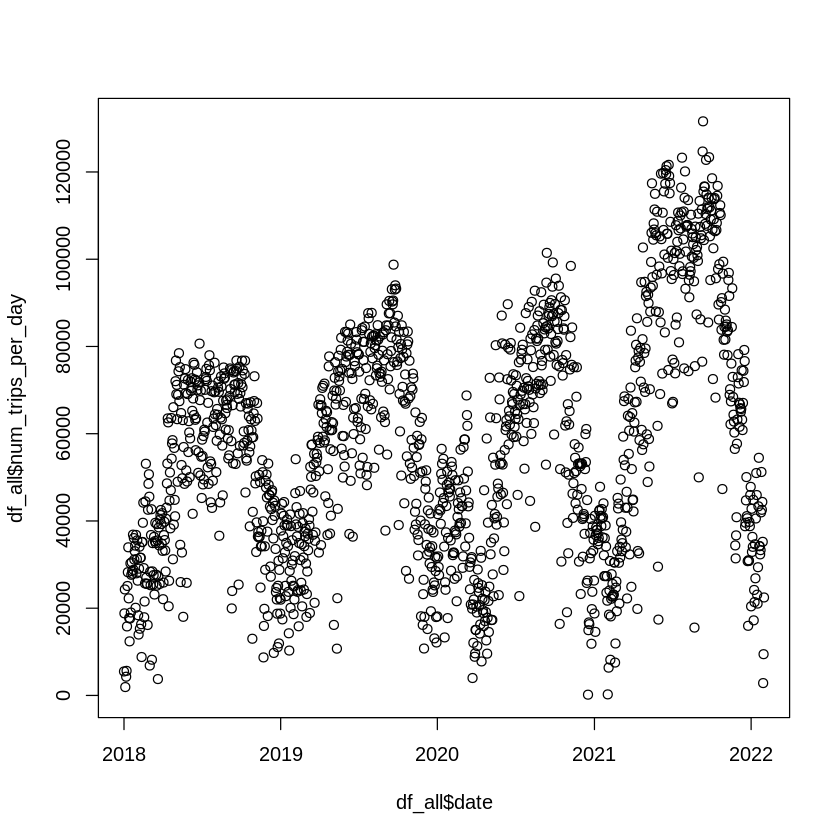

In [ ]:
plot(df_all$date, df_all$num_trips_per_day)

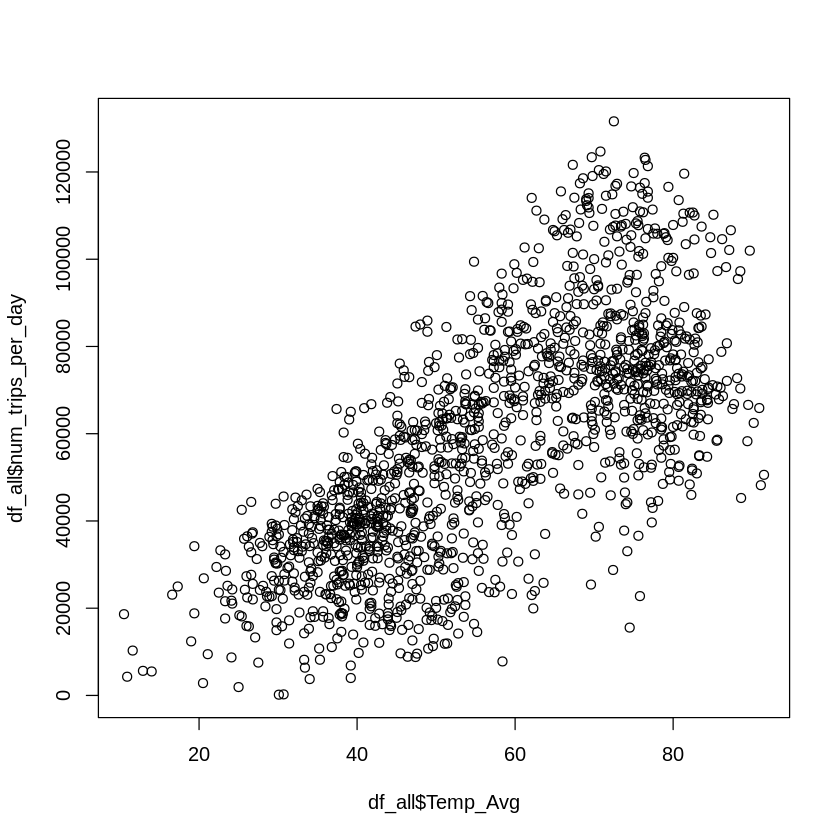

In [ ]:
plot(df_all$Temp_Avg, df_all$num_trips_per_day)

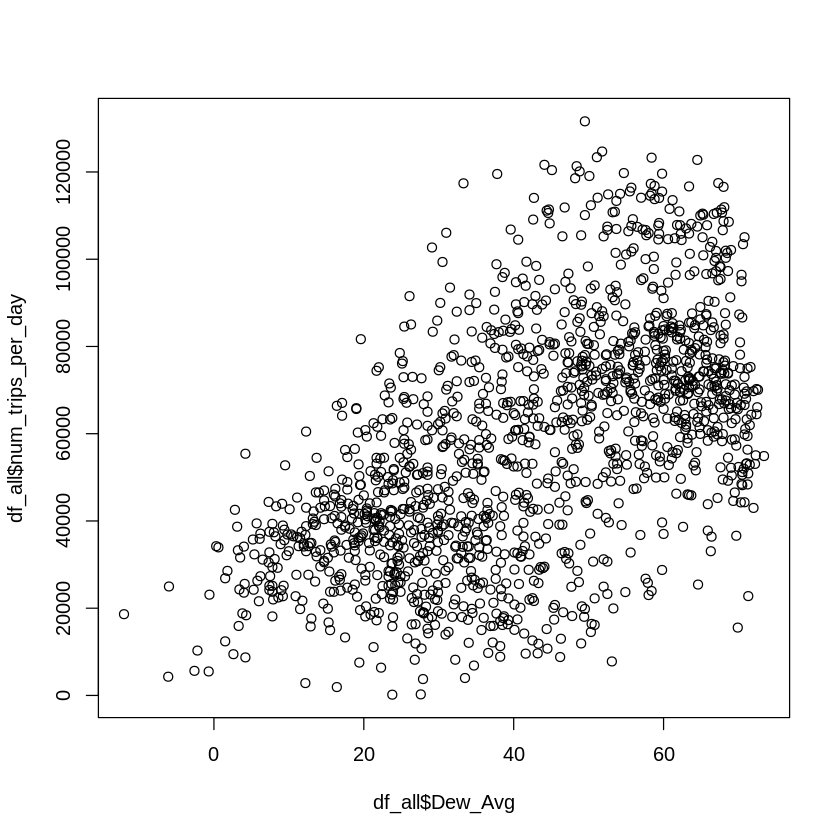

In [ ]:
plot(df_all$Dew_Avg, df_all$num_trips_per_day)

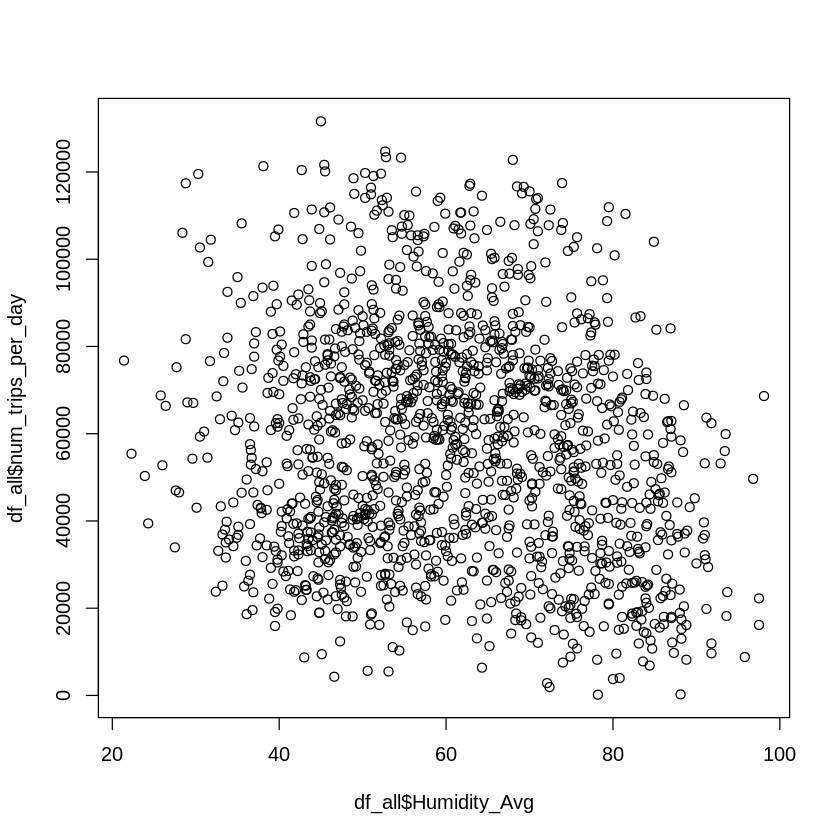

In [ ]:
plot(df_all$Humidity_Avg, df_all$num_trips_per_day)

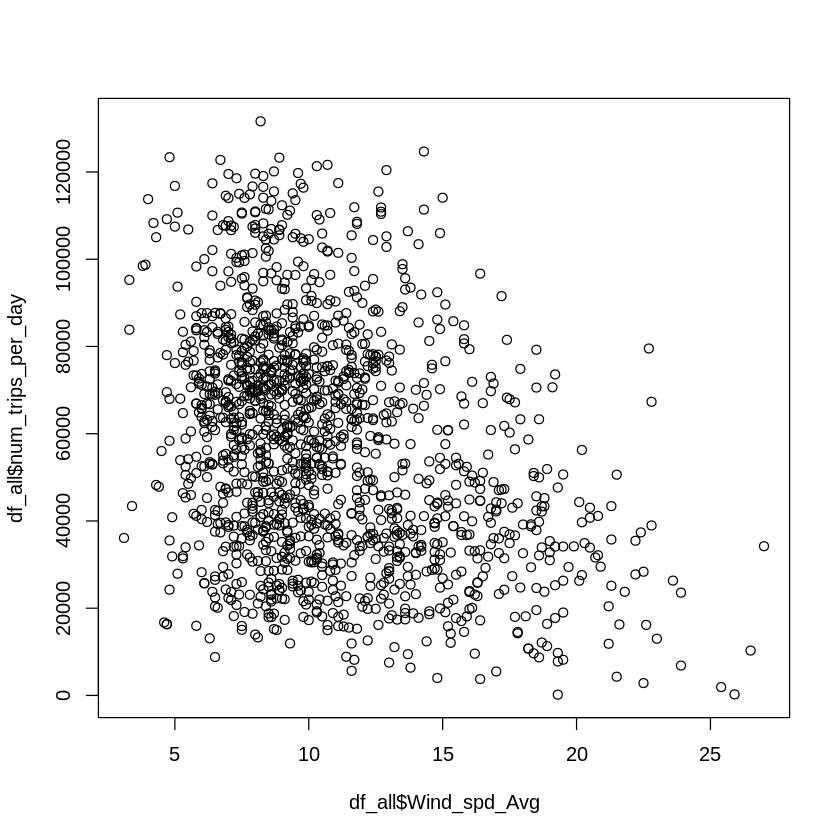

In [ ]:
plot(df_all$Wind_spd_Avg, df_all$num_trips_per_day)

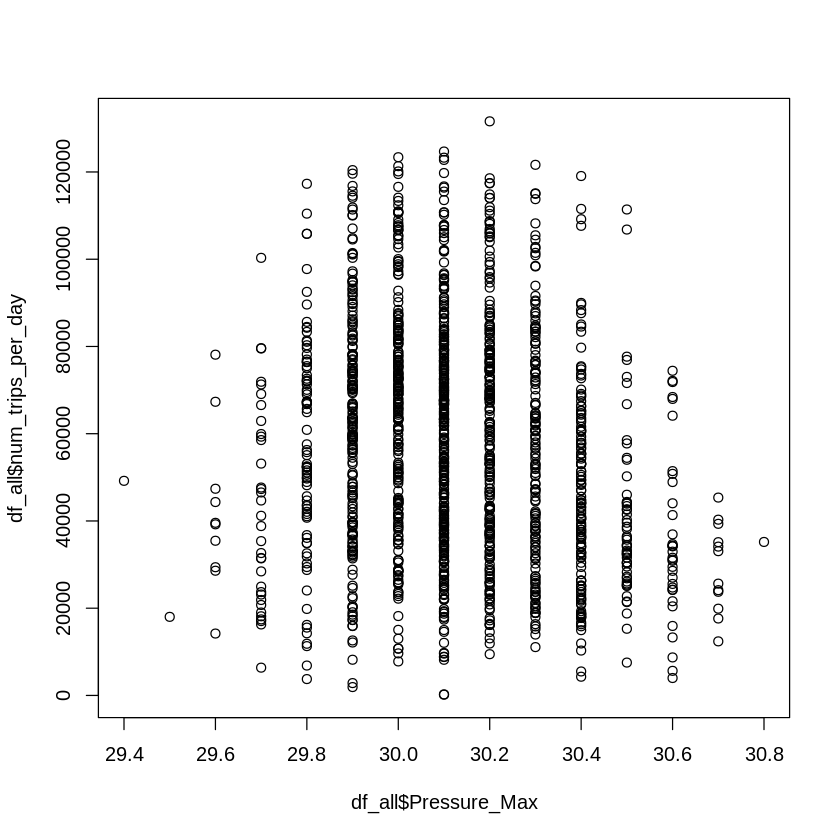

In [ ]:
plot(df_all$Pressure_Max, df_all$num_trips_per_day)

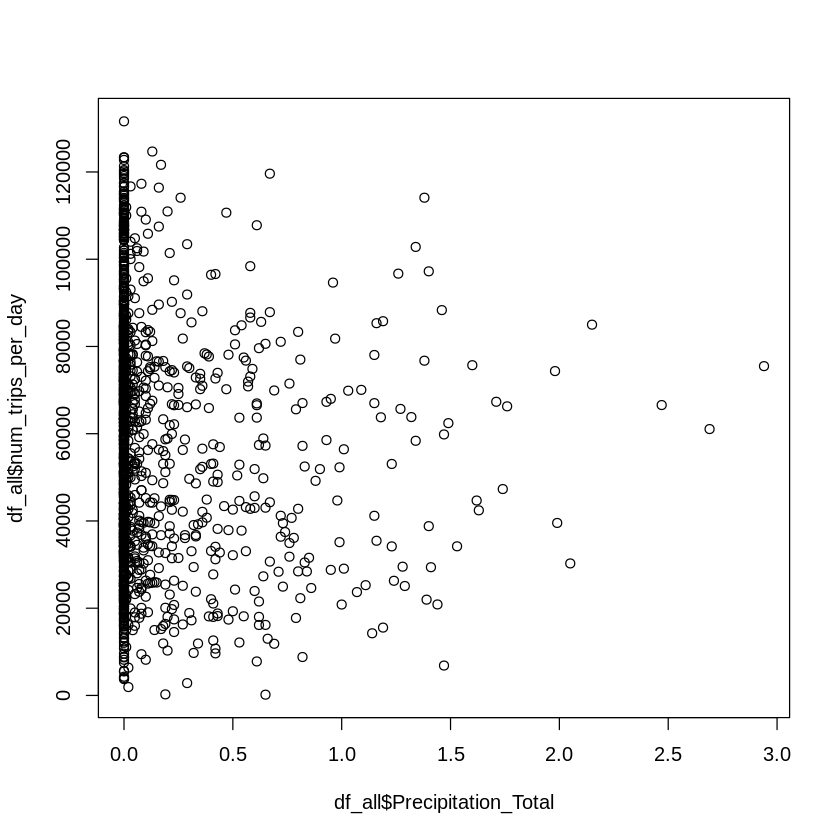

In [ ]:
plot(df_all$Precipitation_Total, df_all$num_trips_per_day)

# Linear Regression and Step Variable Selection


Call:
lm(formula = num_trips_per_day ~ ., data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-56298 -10927   -234  10006  49628 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -31710.72   76214.18  -0.416   0.6774    
Temp_Max              -218.43     240.34  -0.909   0.3636    
Temp_Avg               236.56     608.17   0.389   0.6974    
Temp_Min              -261.40     265.36  -0.985   0.3247    
Dew_Max                 44.38     190.72   0.233   0.8160    
Dew_Avg               1092.09     520.30   2.099   0.0360 *  
Dew_Min                266.96     181.17   1.474   0.1408    
Humidity_Max           184.08      98.43   1.870   0.0616 .  
Humidity_Avg         -1156.65     245.01  -4.721 2.57e-06 ***
Humidity_Min           -38.37     104.60  -0.367   0.7138    
Wind_spd_Max          -407.11     151.78  -2.682   0.0074 ** 
Wind_spd_Avg          -556.02     321.24  -1.731   0.0837 .  
Wind_spd_Min           503.87     207.60 

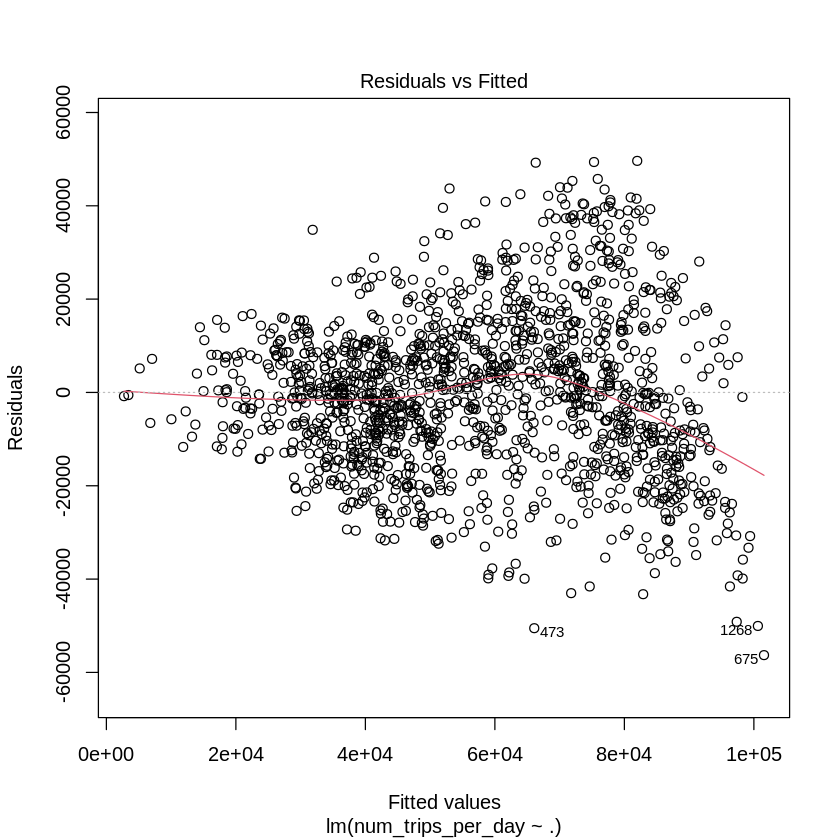

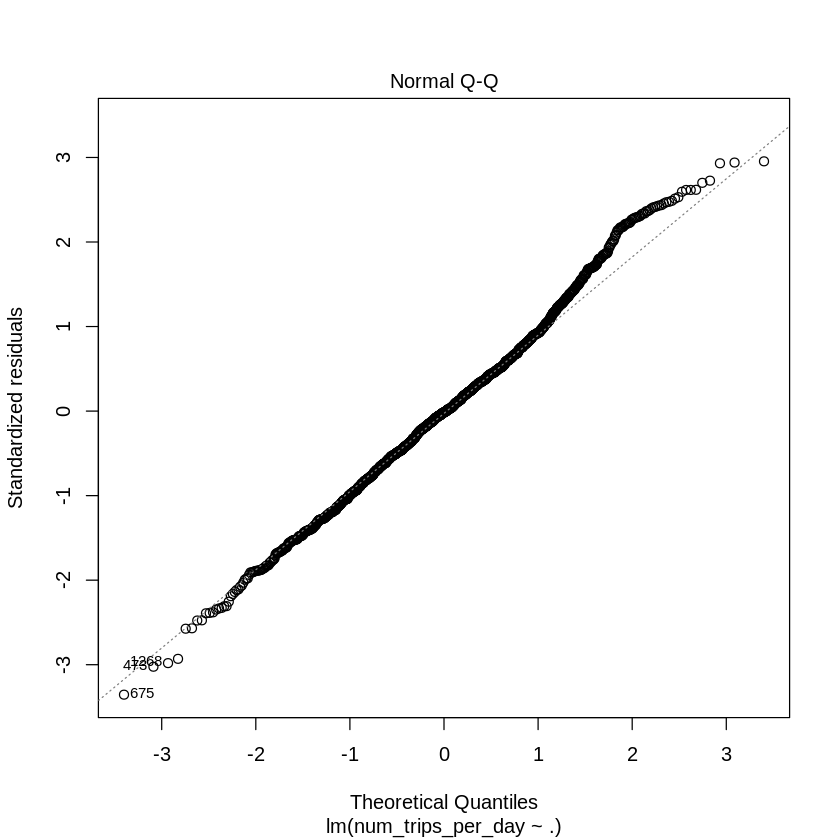

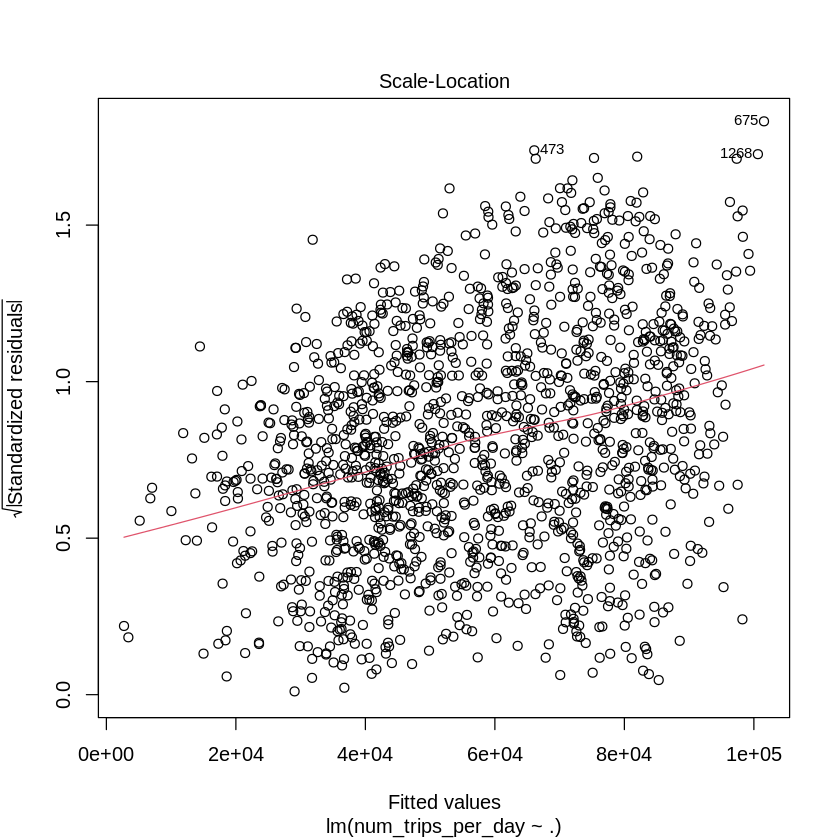

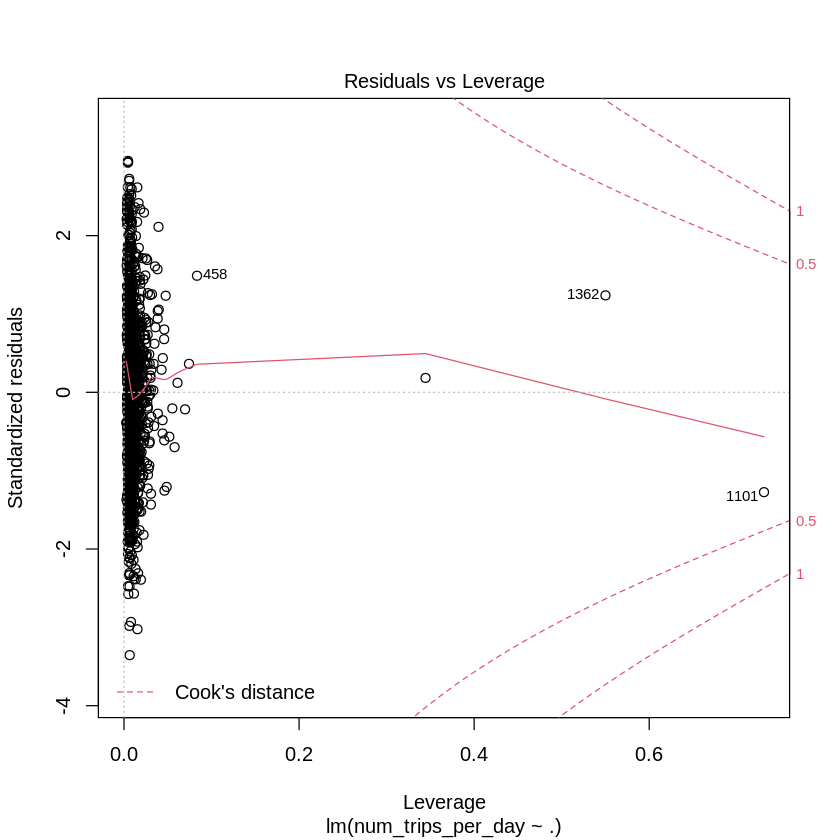

In [ ]:
w_lm <- lm(num_trips_per_day~., df)

summary(w_lm)
plot(w_lm)

In [ ]:
wt_lm <- lm(num_trips_per_day~Temp_Max + Temp_Avg + Temp_Min, df)
summary(wt_lm)


Call:
lm(formula = num_trips_per_day ~ Temp_Max + Temp_Avg + Temp_Min, 
    data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-60524 -11911    146  11384  55610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6474.7     1843.3  -3.513 0.000457 ***
Temp_Max      -351.1      214.8  -1.634 0.102381    
Temp_Avg      2211.6      411.7   5.371 9.06e-08 ***
Temp_Min      -771.2      237.2  -3.252 0.001172 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18420 on 1484 degrees of freedom
Multiple R-squared:  0.5141,	Adjusted R-squared:  0.5132 
F-statistic: 523.5 on 3 and 1484 DF,  p-value: < 2.2e-16


In [ ]:
wws_lm <- lm(num_trips_per_day~Wind_spd_Max + Wind_spd_Avg + Wind_spd_Min, df)
summary(wws_lm)


Call:
lm(formula = num_trips_per_day ~ Wind_spd_Max + Wind_spd_Avg + 
    Wind_spd_Min, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-58166 -18877   -718  16006  74827 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  86096.63    2244.57  38.358  < 2e-16 ***
Wind_spd_Max   -32.67     213.47  -0.153  0.87838    
Wind_spd_Avg -2866.35     444.44  -6.449 1.52e-10 ***
Wind_spd_Min   777.93     296.04   2.628  0.00868 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24740 on 1484 degrees of freedom
Multiple R-squared:  0.1239,	Adjusted R-squared:  0.1222 
F-statistic: 69.98 on 3 and 1484 DF,  p-value: < 2.2e-16


In [ ]:
wh_lm <- lm(num_trips_per_day~Humidity_Max + Humidity_Avg + Humidity_Min, df)
summary(wh_lm)


Call:
lm(formula = num_trips_per_day ~ Humidity_Max + Humidity_Avg + 
    Humidity_Min, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-55038 -21426   -452  17904  72017 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  62490.10    3749.62  16.666  < 2e-16 ***
Humidity_Max   512.70     127.19   4.031 5.83e-05 ***
Humidity_Avg  -753.43     190.00  -3.965 7.68e-05 ***
Humidity_Min    39.77     110.78   0.359     0.72    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25910 on 1484 degrees of freedom
Multiple R-squared:  0.0389,	Adjusted R-squared:  0.03696 
F-statistic: 20.02 on 3 and 1484 DF,  p-value: 1.01e-12


In [ ]:
wps_lm <- lm(num_trips_per_day~Pressure_Max + Pressure_Avg + Pressure_Min, df)
summary(wps_lm)


Call:
lm(formula = num_trips_per_day ~ Pressure_Max + Pressure_Avg + 
    Pressure_Min, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-101775  -18870   -1415   16834  115878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  619345.9    92481.4   6.697 3.01e-11 ***
Pressure_Max -64445.3     5718.3 -11.270  < 2e-16 ***
Pressure_Avg  50063.5     5681.4   8.812  < 2e-16 ***
Pressure_Min  -4106.4      834.9  -4.918 9.69e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25280 on 1484 degrees of freedom
Multiple R-squared:  0.08471,	Adjusted R-squared:  0.08286 
F-statistic: 45.78 on 3 and 1484 DF,  p-value: < 2.2e-16


In [ ]:
wp_lm <- lm(num_trips_per_day~Precipitation_Total, df)
summary(wp_lm)


Call:
lm(formula = num_trips_per_day ~ Precipitation_Total, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-56961 -21221   -429  18115  73164 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          58447.8      738.2   79.17  < 2e-16 ***
Precipitation_Total  -6533.7     2135.4   -3.06  0.00226 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26330 on 1486 degrees of freedom
Multiple R-squared:  0.00626,	Adjusted R-squared:  0.005592 
F-statistic: 9.361 on 1 and 1486 DF,  p-value: 0.002256


In [ ]:
wf_lm <- lm(num_trips_per_day~Temp_Avg+Dew_Min+Wind_spd_Avg+Humidity_Avg+Pressure_Max+Precipitation_Total, df)

summary(wf_lm)


Call:
lm(formula = num_trips_per_day ~ Temp_Avg + Dew_Min + Wind_spd_Avg + 
    Humidity_Avg + Pressure_Max + Precipitation_Total, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-55987 -11146   -215   9885  51171 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -97126.12   72980.36  -1.331 0.183442    
Temp_Avg               760.53      95.53   7.961 3.36e-15 ***
Dew_Min                344.80      93.88   3.673 0.000248 ***
Wind_spd_Avg          -732.05     129.37  -5.658 1.83e-08 ***
Humidity_Avg          -579.71      52.11 -11.125  < 2e-16 ***
Pressure_Max          4727.28    2373.42   1.992 0.046581 *  
Precipitation_Total    116.33    1490.53   0.078 0.937799    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17000 on 1481 degrees of freedom
Multiple R-squared:  0.5871,	Adjusted R-squared:  0.5855 
F-statistic:   351 on 6 and 1481 DF,  p-value: < 2.2e-16


In [ ]:
summary(w_lm)
AIC(w_lm)

summary(wf_lm)
AIC(wf_lm)


Call:
lm(formula = num_trips_per_day ~ ., data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-56298 -10927   -234  10006  49628 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -31710.72   76214.18  -0.416   0.6774    
Temp_Max              -218.43     240.34  -0.909   0.3636    
Temp_Avg               236.56     608.17   0.389   0.6974    
Temp_Min              -261.40     265.36  -0.985   0.3247    
Dew_Max                 44.38     190.72   0.233   0.8160    
Dew_Avg               1092.09     520.30   2.099   0.0360 *  
Dew_Min                266.96     181.17   1.474   0.1408    
Humidity_Max           184.08      98.43   1.870   0.0616 .  
Humidity_Avg         -1156.65     245.01  -4.721 2.57e-06 ***
Humidity_Min           -38.37     104.60  -0.367   0.7138    
Wind_spd_Max          -407.11     151.78  -2.682   0.0074 ** 
Wind_spd_Avg          -556.02     321.24  -1.731   0.0837 .  
Wind_spd_Min           503.87     207.60 

[1] 33202.28


Call:
lm(formula = num_trips_per_day ~ Temp_Avg + Dew_Min + Wind_spd_Avg + 
    Humidity_Avg + Pressure_Max + Precipitation_Total, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-55987 -11146   -215   9885  51171 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -97126.12   72980.36  -1.331 0.183442    
Temp_Avg               760.53      95.53   7.961 3.36e-15 ***
Dew_Min                344.80      93.88   3.673 0.000248 ***
Wind_spd_Avg          -732.05     129.37  -5.658 1.83e-08 ***
Humidity_Avg          -579.71      52.11 -11.125  < 2e-16 ***
Pressure_Max          4727.28    2373.42   1.992 0.046581 *  
Precipitation_Total    116.33    1490.53   0.078 0.937799    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17000 on 1481 degrees of freedom
Multiple R-squared:  0.5871,	Adjusted R-squared:  0.5855 
F-statistic:   351 on 6 and 1481 DF,  p-value: < 2.2e-16


[1] 33220.49

In [ ]:
step(w_lm)

Start:  AIC=28977.52
num_trips_per_day ~ Temp_Max + Temp_Avg + Temp_Min + Dew_Max + 
    Dew_Avg + Dew_Min + Humidity_Max + Humidity_Avg + Humidity_Min + 
    Wind_spd_Max + Wind_spd_Avg + Wind_spd_Min + Pressure_Max + 
    Pressure_Avg + Pressure_Min + Precipitation_Total

                      Df  Sum of Sq        RSS   AIC
- Pressure_Max         1      17769 4.1705e+11 28976
- Dew_Max              1   15349439 4.1707e+11 28976
- Pressure_Min         1   19740843 4.1707e+11 28976
- Humidity_Min         1   38157603 4.1709e+11 28976
- Temp_Avg             1   42896103 4.1710e+11 28976
- Precipitation_Total  1   54619272 4.1711e+11 28976
- Temp_Max             1  234182525 4.1729e+11 28976
- Pressure_Avg         1  249666383 4.1730e+11 28976
- Temp_Min             1  275124550 4.1733e+11 28976
<none>                              4.1705e+11 28978
- Dew_Min              1  615616531 4.1767e+11 28978
- Wind_spd_Avg         1  849392153 4.1790e+11 28978
- Humidity_Max         1  991687483 


Call:
lm(formula = num_trips_per_day ~ Dew_Avg + Dew_Min + Humidity_Max + 
    Humidity_Avg + Wind_spd_Max + Wind_spd_Avg + Wind_spd_Min + 
    Pressure_Avg, data = df)

Coefficients:
 (Intercept)       Dew_Avg       Dew_Min  Humidity_Max  Humidity_Avg  
    -27745.2         945.2         199.0         198.5       -1094.2  
Wind_spd_Max  Wind_spd_Avg  Wind_spd_Min  Pressure_Avg  
      -413.8        -530.2         493.0        3380.4  


In [ ]:
w_step_lm <- lm(formula = num_trips_per_day ~ Dew_Avg + Dew_Min + Humidity_Max + Humidity_Avg + 
    Wind_spd_Max + Wind_spd_Avg + Wind_spd_Min + Pressure_Avg, data = df)

summary(w_step_lm)
AIC(w_step_lm)


Call:
lm(formula = num_trips_per_day ~ Dew_Avg + Dew_Min + Humidity_Max + 
    Humidity_Avg + Wind_spd_Max + Wind_spd_Avg + Wind_spd_Min + 
    Pressure_Avg, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-55539 -10918   -330   9705  49946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -27745.23   52527.56  -0.528  0.59744    
Dew_Avg         945.21     126.04   7.499  1.1e-13 ***
Dew_Min         198.97     116.30   1.711  0.08731 .  
Humidity_Max    198.54      76.99   2.579  0.01001 *  
Humidity_Avg  -1094.21      70.26 -15.573  < 2e-16 ***
Wind_spd_Max   -413.79     148.68  -2.783  0.00545 ** 
Wind_spd_Avg   -530.17     312.07  -1.699  0.08955 .  
Wind_spd_Min    493.01     205.14   2.403  0.01637 *  
Pressure_Avg   3380.36    1706.08   1.981  0.04774 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16800 on 1479 degrees of freedom
Multiple R-squared:  0.5971,	Adjusted R-squared:  0.594

[1] 33188.21

#Linear Regression - Training Data

In [ ]:
wft_lm <- lm(num_trips_per_day~Temp_Avg+Dew_Min+Wind_spd_Avg+Humidity_Avg+Pressure_Avg+Precipitation_Total, df_train)

summary(wft_lm)


Call:
lm(formula = num_trips_per_day ~ Temp_Avg + Dew_Min + Wind_spd_Avg + 
    Humidity_Avg + Pressure_Avg + Precipitation_Total, data = df_train)

Residuals:
   Min     1Q Median     3Q    Max 
-57674 -11183    -75  10154  50492 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -79251.1    59648.6  -1.329  0.18426    
Temp_Avg               831.0      114.8   7.242 8.61e-13 ***
Dew_Min                304.8      112.7   2.704  0.00697 ** 
Wind_spd_Avg          -755.4      158.8  -4.758 2.23e-06 ***
Humidity_Avg          -545.1       63.0  -8.653  < 2e-16 ***
Pressure_Avg          4014.0     1914.8   2.096  0.03629 *  
Precipitation_Total   3188.8     1362.4   2.341  0.01944 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17270 on 1036 degrees of freedom
Multiple R-squared:  0.5911,	Adjusted R-squared:  0.5887 
F-statistic: 249.6 on 6 and 1036 DF,  p-value: < 2.2e-16


In [ ]:
wt_step_lm <- lm(formula = num_trips_per_day ~ Dew_Avg + Dew_Min + Humidity_Max + Humidity_Avg + 
    Wind_spd_Max + Wind_spd_Avg + Wind_spd_Min + Pressure_Avg, data = df_train)

summary(wt_step_lm)


#Model Testing - Prediction & Accuracy

In [ ]:
pred_step <- predict(wt_step_lm, df_test)

actuals_preds_step <- data.frame(cbind(actuals=df_test$num_trips_per_day, predicteds=pred_step))  # make actuals_predicteds dataframe. 
correlation_accuracy_step <- cor(actuals_preds_step) # 77.049%
correlation_accuracy_step
head(actuals_preds_step) 

In [ ]:
# Calculate mean absolute percentage error (MAPE)
errors_step = abs(actuals_preds_step$predicteds - actuals_preds_step$actuals)
mape_step = (errors_step / actuals_preds_step$actuals)
print (paste0("Mean Absolute Percentage Deviation:", round(mean(mape_step) * 100, 2), "%"))
# Calculate and display accuracy
accuracy_step = 100 - mean(mape_step * 100)
print (paste0('Accuracy:', round(accuracy_step, 2), '%.'))
# Calculate RMSE
rmse_step = sqrt(mean((df_test$num_trips_per_day - pred_step)^2))
print (paste0("Root Mean Squared Error: ", round(rmse_step), " rides."))

In [ ]:
pred <- predict(wft_lm, df_test)

actuals_preds <- data.frame(cbind(actuals=df_test$num_trips_per_day, predicteds=pred))  # make actuals_predicteds dataframe. 
correlation_accuracy <- cor(actuals_preds) # 75.79%
correlation_accuracy
head(actuals_preds) 

In [ ]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(actuals_preds$predicteds - actuals_preds$actuals)
mape = (errors / actuals_preds$actuals)
print (paste0("Mean Absolute Percentage Deviation:", round(mean(mape) * 100, 2), "%"))
# Calculate and display accuracy
accuracy = 100 - mean(mape * 100)
print (paste0('Accuracy:', round(accuracy, 2), '%.'))
# Calculate RMSE
rmse = sqrt(mean((df_test$num_trips_per_day - pred)^2))
print (paste0("Root Mean Squared Error: ", round(rmse), " rides."))


### We have performed two linear regression models, one was created using the step method of variable selection and the other was values filtered based on significance of p-value. The step method had a slightly higher Adjusted R^2 value but the manual method has few a parameters, making it simpler. Both yeilded similar results with correlation accuracy of 69.1% and 67.49%. The root mean squared error is 17022 and 17420 rides representing 30.90% and 32.51% percentage of mean absolute deviation respectively.

*Note: Additional analysis was performed with respect to covid. While there is a significant rise in the number of rides post covid, there is no significant correlation to weather changes during that period.
Additional preliminary analysis can be referred to here: https://colab.research.google.com/drive/1m-JKZlbYoxHly1ytsavn0KQreXheJr1s?usp=sharing* 